# SUITE ET FIN PREDICTION DE LA MALADIE CARDIAQUE

Dans la deuxième partie, nous avons fais un préprocessing sur notre jeu de donnée où nous avons regardé comment nos variables qualitatives devraient être encdodés. Dans cette troisième et dernière partie, nous mettons en place un modèle de machine learning et comparons les performances obténues avec d'autres modèles de machine learning en faisant varier quelques élements au niveau du préprocessing par exemple on comparera le résultat obténu par une régression logistique avec celui obténu par un séparateur à vaste marge ou une analyse discriminante; nous pourrons encore comparer les performances obténus à partir des données transformées à la même échelle et des données qui ne sont pas à la même échelle. dans la ligne qui suit, nous importerons toutes nos librairies nécessaire pour en venir à bout de cet exercice avant de charger le jeu de donnée.

In [1]:
import pandas as pd #librairie pandas me permettant de faire des manip sur des tableaux
import matplotlib.pyplot as plt #librairie me permettant de faire des visualisations graphiques
import seaborn as sns #alternative à la librairie précedente
import numpy as np # importation de numpy pour gerer les espaces vectoriels

from sklearn.model_selection import GridSearchCV #en vue de trouver le meilleur paramètre donnant les meilleurs performances un niveau de l'algorithme de prédiction qui sera utilisé

from sklearn.preprocessing import StandardScaler # librairie permettant d'importer standard scaler qui permettra de normaliser les variables

from sklearn.preprocessing import RobustScaler # librairie permettant d'importer standard scaler qui permettra de normaliser les variables

from sklearn.model_selection import train_test_split # nécessaire pour diviser le jeu de donnée notamment dans une optique de validation croisée

from sklearn.preprocessing import OneHotEncoder # cette librairie nous permettra d'encoder les variables qualitatives lors du préprocessing

from sklearn.metrics import classification_report, f1_score, confusion_matrix # certaines métriques qui permettront d'avoir des informations sur la performance de la méthode utilisée ici

from sklearn.model_selection import validation_curve # cette librairie nous permettra d'importer la courbe de validation croisé

from sklearn.model_selection import learning_curve # courbe d'apprentissage pour verifier l'écart entre les données d'entrainement prédites et les données de tests prédites

from sklearn.linear_model import Ridge

from sklearn.svm import SVC # librairie du séparateur à vaste marge méthode d'estimation vu que la variable cible est qualitative

from sklearn.linear_model import LogisticRegression # libraire de la régression logistique

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # librairie de l'analyse discriminante linéaire

In [2]:
df = pd.read_excel("heart_disease.xlsx") #comme nous l'avons dis, nous avons affaire à un fichier excel nous utilisons donc 
                                         # la librairie pandas et l'attribut read_excel puis le nom du fichier
    
df.head(10) #pour verifier si le jeu de donnée a bien été chargé 

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
5,39,homme,DNA,120,339,0,Normal,170,Non,0.0,Ascendant,0
6,45,femme,AA,130,237,0,Normal,170,Non,0.0,Ascendant,0
7,54,homme,AA,110,208,0,Normal,142,Non,0.0,Ascendant,0
8,37,homme,ASY,140,207,0,Normal,130,Oui,1.5,Plat,1
9,48,femme,AA,120,284,0,Normal,120,Non,0.0,Ascendant,0


# A ) Encodage des variables  

In [3]:
vquali = df.select_dtypes(object)
vquanti = df.select_dtypes(exclude=['object'])

In [4]:

encoder = OneHotEncoder(sparse=False, drop='if_binary') # l'option sparse pour afficher dans une liste

enco = encoder.fit_transform(vquali)

encode = pd.DataFrame(enco, index = vquali.index)

encode.columns = encoder.get_feature_names(vquali.columns)

df1 = pd.concat([encode, vquanti], axis = 1)
df1

,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,40,140,289,0,172,0.0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,49,160,180,0,156,1.0,1
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,37,130,283,0,98,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,48,138,214,0,108,1.5,1
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,45,110,264,0,132,1.2,1
914,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,68,144,193,1,141,3.4,1
915,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,57,130,131,0,115,1.2,1
916,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,57,130,236,0,174,0.0,1


Cette partie a été dejà aborder dans la partie 2, nous attarderons pas trop sur les commentaires ici

### Séparation du jeu de donnée
Pour commencer, nous isolons la variable cible des variables explicatives. Dans l'optique d'effectué une validation croisée parfaite, avant de nous lancer, nous séparons le jeu de donnée en deux. Une partie servira à faire l'entrainement du modèle de machine learning soit les 70%. L'autre partie servira à éffectuer des tests sur le modèle obtenu soit les 30%. Celà nous permettra de savoir si à partir des performances à l'entrainement et en test si les données ont surappris ou pas

In [5]:
X = df1.drop(['CŒUR'], axis=1) # jeu de donnée isolé de la variable cible coeur
y = df1['CŒUR'] #variable cible coeur

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # séparation du jeu de donnée en donnée d'entrainement et de test

# B) Implementation du premier modèle et verification des performances obténues

Le premier modèle de machine implementé ici est obtenu grace à la regression logistique. Dans les lignes qui suivent nous montrons comment il est implementé avant d'observer ses performances

## B-1) implementation du modèle et performance

In [6]:
logreg = LogisticRegression(solver='liblinear', random_state=0) # appelation de la regression logistique, nous choisissons liblinear vu la petite taille du jeu de donnée
logreg.fit(X_train, y_train) # application de la régression logistique sur les données d'entrainement
logreg.score(X_train, y_train) #score à l'entrainement

0.8769470404984424

In [7]:
y_pred = logreg.predict(X_test) # prédiction des données de test à partir du modèle implementé
logreg.score(X_test, y_test) #score sur les données de test

0.8369565217391305

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       113
           1       0.85      0.88      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



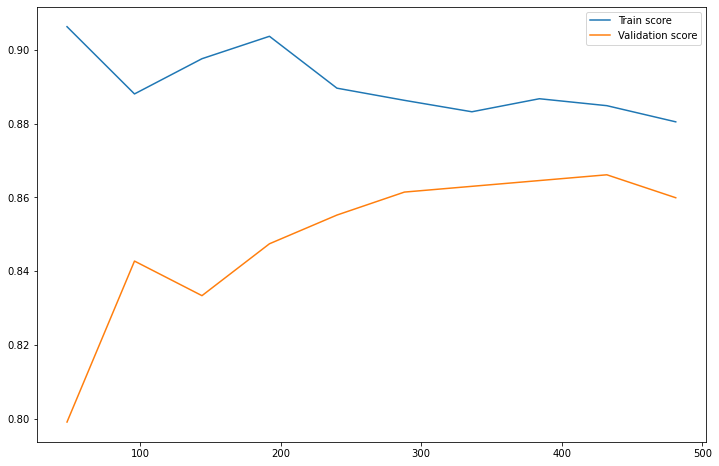

In [9]:
N, train_score, val_score = learning_curve(logreg, X_train, y_train,cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label = 'Train score')
plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
plt.legend();

## B-2) Que retenir pour cette sous section

nous avons un score à l'entrainement de 87 %, un score sur les données de test de 83%. Quant à la courbe d'apprentissage, nous remarquons qu'au début, il ya un écart considérable qui tends à se réduire au fur et à mésure que le jeu de donnée s'aggrandis. conclusion l'ajout de plus de données contribuera à avoir un meilleur modèle

## C) comparaison des performances avec d'autres méthodes d'estimations

## C-1) Analyse discriminante linéaire

In [10]:

ad = LinearDiscriminantAnalysis( n_components=1) # appelation de la regression logistique, nous choisissons liblinear vu la petite taille du jeu de donnée
ad.fit(X_train, y_train) # application de la régression logistique sur les données d'entrainement
ad.score(X_train, y_train) #score à l'entrainement

0.8753894080996885

In [11]:
y_pred = ad.predict(X_test) # prédiction des données de test à partir du modèle implementé

In [12]:
ad.score(X_test, y_test) #score sur les données de test

0.8333333333333334

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       113
           1       0.85      0.87      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



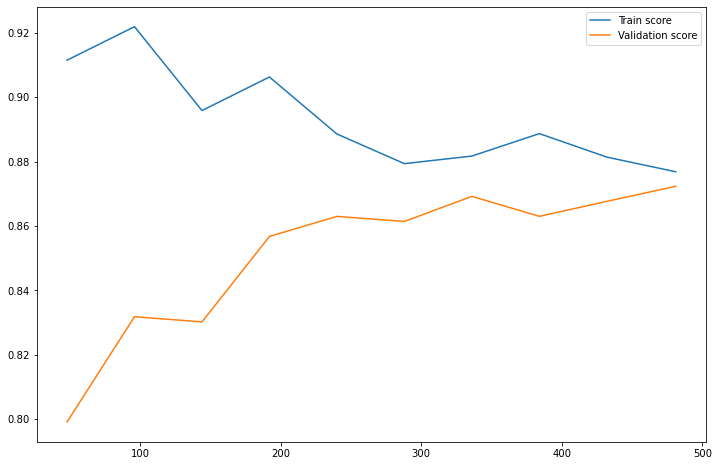

In [14]:
N, train_score, val_score = learning_curve(ad, X_train, y_train,cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label = 'Train score')
plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
plt.legend();

### Conclusion partielle

A ce niveau les scores sur les données d'entrainement et de test sont pratiquement les même tant en appliquant une régression logistique au modèle qu'une analyse discriminante, elles ont légèrement les mêmes tendances au niveau des courbes d'apprentissages sauf que dans le cas de l'analyse discriminante elle semble légèrement rapprochée. Nous trancherons donc que l'analyse discriminante serait préferé par rapport à la régression logistique. Au départ nous avons une grande variance surapprentissage mais au fur et à mésure que les données augmentent ils se réajuste et tends vers un sous apprentissage. nous avons donc quelque chose d'optimale ici. L'ajout de données ici compliqueras un modèle complexe

## C-3) Séparateur à vaste marge

In [16]:

svm = SVC() # appelation du séparateur à vaste marge (svm) régulier puisque nous ne définissons pas de noyau suite peut être à une non linéarité de la relation 
svm.fit(X_train, y_train) # application du svm au jeu de donnée
svm.score(X_train, y_train) #score à l'entrainement

0.7180685358255452

In [17]:
y_pred = svm.predict(X_test) # prédiction des données de test à partir du modèle implementé

In [18]:
svm.score(X_test, y_test) #score sur les données de test

0.7137681159420289

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67       113
           1       0.78      0.72      0.75       163

    accuracy                           0.71       276
   macro avg       0.71      0.71      0.71       276
weighted avg       0.72      0.71      0.72       276



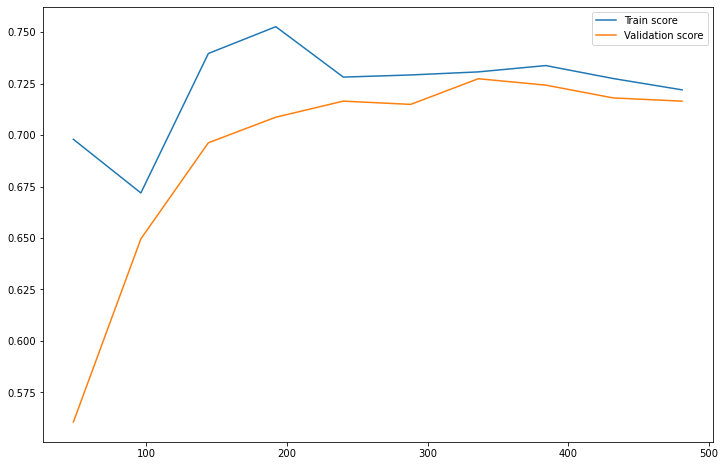

In [20]:
N, train_score, val_score = learning_curve(svm, X_train, y_train,cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label = 'Train score')
plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
plt.legend();

### Conclusion partielle 
Lorsqu'on applique le séparateur à vaste marge, on obtiens de faible performance soit autour de 70 % de score sur données de test et d'entrainement. Cependant lorsqu'on observe la courbe d'apprentissage l'écart est relativement faible entre . l'écart faible traduisant ici une faible variance risque d'entrainer un sous apprentissage. le modèle est trop simple nous compliquerons alors un peu le modèle et observerons les performances obtenues en faisant l'hypothèse que nous avons une rélation non linéaire ici.

### recherche de la meilleure performance en faisant varier les paramètres

à ce niveau nous utiliserons gridsearch cv pour rechercher les meilleurs paramètres dans chaque cas ici

### Cas de la régression logistique

In [21]:
param_grid = {'solver': ['newton-cg', 'lbgfs', 'liblinear', 'sag', 'saga'],  
              'max_iter': [50, 100, 200, 300, 400, 500]}  
   
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:   15.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   15.1s finished


{'max_iter': 50, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       113
           1       0.84      0.88      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.82      0.83       276
weighted avg       0.83      0.83      0.83       276



### 
Dans le cas de la régression logistique les meilleurs paramètres sont solver : 'newton-cg' pour un maximum d'itérations de 50

### 
On obtient ici le même résultat que la régression linéaire mais avec de meilleures performances que dans le cas par défaut où le noyau est de type rbf

### Cas de l'analyse discriminante

In [22]:
param_grid = {'solver': ['svd', 'lsqr', 'eigen']}  
   
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'solver': 'svd'}
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       113
           1       0.85      0.87      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.2s finished


### 
Dans le cas de l'analyse discriminante, il nous indique que le meilleur modèle est celui obtenu avec le paramètre solver svd.

### Cas du séparateur à vaste marge

In [23]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid',]}  

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.2s finished


{'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       113
           1       0.85      0.88      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



### 
Dans le cas du séparateur à vaste marge, il nous indique que le meilleur modèle est celui obtenu avec le paramètre kernel linear au niveau du séparateur à vaste marge.

##  CONCLUSION 

dans les deux premiers cas régression logistique et analyse discriminante, l'élargissement du dataset peut être nécessaire
dans le troisième cas l'élargissement du dataset peut conduire à un surapprentissage. Avant de trancher sur la selection du modèle observons les résultats si on changeait quelques paramètres. A quel niveau ce trouve biais plus élevé que dans les deux autres cas  ou variance biais élévé variance faible. traduit un modèle simple faut le compliquer légèrement

## D) Reprise du même procéssus sur des données normalisées

La normalisation est une étape qui permet de rendre les données à la même échelle. Il se pourraient qu'on obtiennent un score élevé si les données sont à la même échelle. Cela n'est certes pas toujours verifié mais ça ne coûte rien d'essayer cette démarche dans le cadre de cet exercice. Rappelons que toutefois elle n'est pas forcement nécessaire dans le contexte où elle contribuera à faire perdre des informations. Ici nous utilisons la méthode standard scaler qui ne tiens pas compte des valeurs aberrantes et qui lui tiens compte des valeurs aberrantes. Notons que la normalisation sera effectuée sur l'age, le taux de choresterol, le niveau de pression artériel, la fréquence cardiaque maximale.

### D-1) Normalisation par le standard scaler

In [24]:

vquanti_norm = df[['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX']] # récupération des variables quantitatives qui seront normalisées

vquanti_non_norm = df[['GAJ', 'DEPRESSION ']] # récupération des variables quantitatives qui ne seront pas normalisées

v_cible = df[['CŒUR']] # récupération de la variable coeur

In [25]:
vq0 = StandardScaler()

vq = vq0.fit_transform(vquanti_norm)

vq1 = pd.DataFrame(vq, index = vquanti_norm.index)

vq1 # variables quantitatives normalisées

df2 = pd.concat([encode, vq1, vquanti_non_norm, v_cible] , axis =1)

df2


,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat,0,1,2,3,GAJ,DEPRESSION,CŒUR
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.433140,0.410909,0.825070,1.382928,0,0.0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.478484,1.491752,-0.171961,0.754157,0,1.0,1
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.751359,-0.129513,0.770188,-1.525138,0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.584556,0.302825,0.139040,-1.132156,0,1.5,1
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.051881,0.951331,-0.034755,-0.581981,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.902775,-1.210356,0.596393,-0.188999,0,1.2,1
914,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.536902,0.627078,-0.053049,0.164684,1,3.4,1
915,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.370100,-0.129513,-0.620168,-0.857069,0,1.2,1
916,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.370100,-0.129513,0.340275,1.461525,0,0.0,1


In [26]:
X = df2.drop(['CŒUR'], axis=1) # jeu de donnée isolé de la variable cible coeur
y = df2['CŒUR'] #variable cible coeur

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # séparation du jeu de donnée en donnée d'entrainement et de test

### D-1-1) performances avec la régression logistique en tenant compte des paramètres obténus avec grid search cv

In [27]:
logreg = LogisticRegression(solver='newton-cg', max_iter=50 , random_state=0) # appelation de la regression logistique, nous choisissons liblinear vu la petite taille du jeu de donnée
logreg.fit(X_train, y_train) # application de la régression logistique sur les données d'entrainement
logreg.score(X_train, y_train) #score à l'entrainement

0.8769470404984424

In [28]:
y_pred = logreg.predict(X_test) # prédiction des données de test à partir du modèle implementé
logreg.score(X_test, y_test) #score sur les données de test

0.8333333333333334

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       113
           1       0.84      0.88      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.82      0.83       276
weighted avg       0.83      0.83      0.83       276



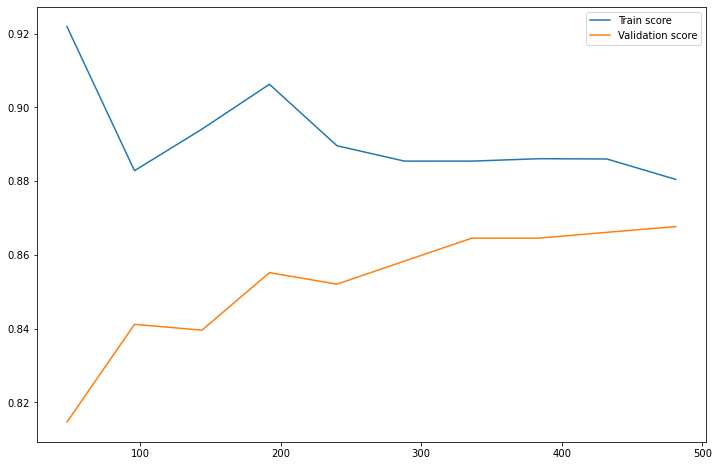

In [30]:
N, train_score, val_score = learning_curve(logreg, X_train, y_train,cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label = 'Train score')
plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
plt.legend();

In [31]:
param_grid = {'solver': ['newton-cg', 'lbgfs', 'liblinear', 'sag', 'saga'],  
              'max_iter': [50, 100, 200, 300, 400, 500]}  
   
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


{'max_iter': 50, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       113
           1       0.84      0.88      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.82      0.83       276
weighted avg       0.83      0.83      0.83       276



[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.3s finished


### D-1-2) performances avec l'analyse discriminante en tenant compte des paramètres obténus avec grid search cv

In [32]:

ad = LinearDiscriminantAnalysis( solver='svd' ,n_components=1) # appelation de la regression logistique, nous choisissons liblinear vu la petite taille du jeu de donnée
ad.fit(X_train, y_train) # application de la régression logistique sur les données d'entrainement
ad.score(X_train, y_train) #score à l'entrainement

0.8753894080996885

In [33]:
y_pred = ad.predict(X_test) # prédiction des données de test à partir du modèle implementé

In [34]:
ad.score(X_test, y_test) #score sur les données de test

0.8333333333333334

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       113
           1       0.85      0.87      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



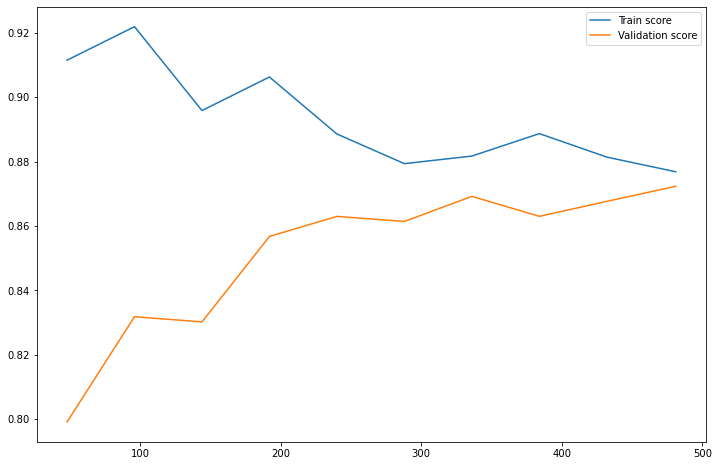

In [36]:
N, train_score, val_score = learning_curve(ad, X_train, y_train,cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label = 'Train score')
plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
plt.legend();

In [37]:
param_grid = {'solver': ['svd', 'lsqr', 'eigen']}  
   
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished


{'solver': 'lsqr'}
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       113
           1       0.85      0.87      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



### On obtient que le meilleur paramètre pour l'analyse discriminante après standarisation de certaines variables quantitatives est solver = 'lsqr'. Dans les lignes qui suivent nous évaluons les performances de ce dernier

In [44]:

ad = LinearDiscriminantAnalysis( solver='lsqr' ,n_components=1) # appelation de la regression logistique, nous choisissons liblinear vu la petite taille du jeu de donnée
ad.fit(X_train, y_train) # application de la régression logistique sur les données d'entrainement
ad.score(X_train, y_train) #score à l'entrainement

0.8753894080996885

In [45]:
y_pred = ad.predict(X_test) # prédiction des données de test à partir du modèle implementé

In [46]:
ad.score(X_test, y_test) #score sur les données de test

0.8333333333333334

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       113
           1       0.85      0.87      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



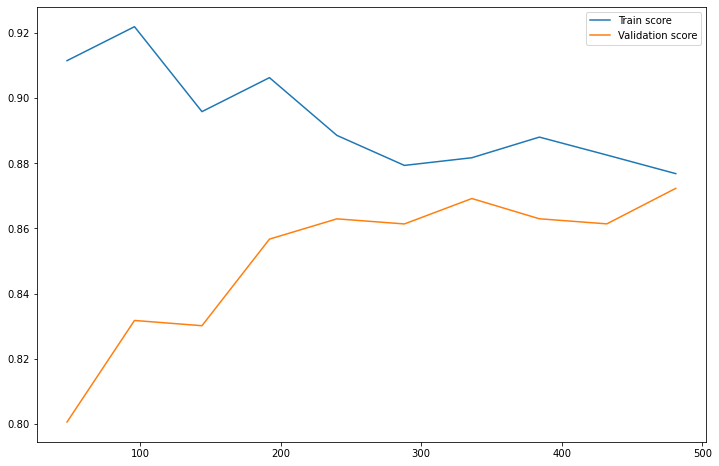

In [48]:
N, train_score, val_score = learning_curve(ad, X_train, y_train,cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label = 'Train score')
plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
plt.legend();

### On espérais obtenir quelque chose de meilleur. Apparemment on obtiens les même performances

### D-1-3) Performances avec le séparateur à vaste marge en tenant compte des paramètres obténus avec grid search cv

In [38]:

svm = SVC(kernel='linear') # appelation du séparateur à vaste marge (svm) régulier puisque nous ne définissons pas de noyau suite peut être à une non linéarité de la relation 
svm.fit(X_train, y_train) # application du svm au jeu de donnée
svm.score(X_train, y_train) #score à l'entrainement

0.8785046728971962

In [39]:
y_pred = svm.predict(X_test) # prédiction des données de test à partir du modèle implementé

In [40]:
svm.score(X_test, y_test) #score sur les données de test

0.8369565217391305

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       113
           1       0.85      0.88      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



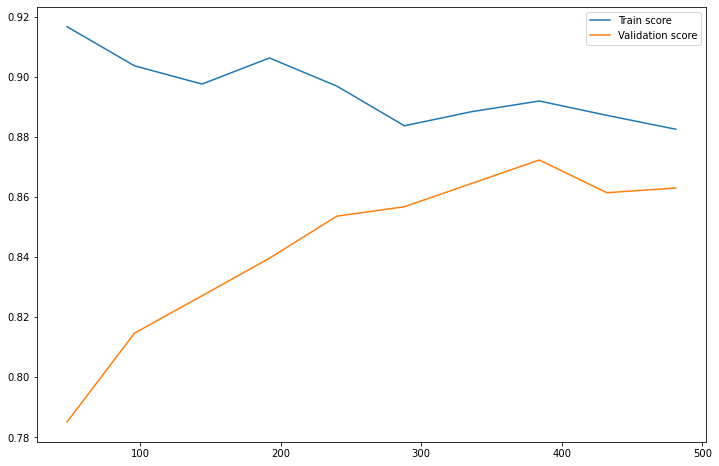

In [42]:
N, train_score, val_score = learning_curve(svm, X_train, y_train,cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label = 'Train score')
plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
plt.legend();

In [43]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid',]}  

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       113
           1       0.85      0.88      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished


### Rien à signaler au niveau des paramètres de base du séparateur à vaste marge

### D-1-4) Que retenir de cette partir (normalisation avec le standard scaler)
On retiens qu'on a les même performances que précedemment

### D-2) Normalisation par le robust scaler

In [49]:
vq0_ro = RobustScaler()

vq_ro = vq0_ro.fit_transform(vquanti_norm)

vq1_ro = pd.DataFrame(vq_ro, index = vquanti_norm.index)

vq1_ro # variables quantitatives normalisées

df3 = pd.concat([encode, vq1_ro, vquanti_non_norm, v_cible] , axis =1)

df3 #troisième jeu de donnée avec données normalisées avec le robustscaler

,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat,0,1,2,3,GAJ,DEPRESSION,CŒUR
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.076923,0.5,0.704000,0.944444,0,0.0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.384615,1.5,-0.458667,0.500000,0,1.0,1
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.307692,0.0,0.640000,-1.111111,0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.461538,0.4,-0.096000,-0.833333,0,1.5,1
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,-0.298667,-0.444444,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.692308,-1.0,0.437333,-0.166667,0,1.2,1
914,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.076923,0.7,-0.320000,0.083333,1,3.4,1
915,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.230769,0.0,-0.981333,-0.638889,0,1.2,1
916,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.230769,0.0,0.138667,1.000000,0,0.0,1


In [50]:
X = df3.drop(['CŒUR'], axis=1) # jeu de donnée isolé de la variable cible coeur
y = df3['CŒUR'] #variable cible coeur

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # séparation du jeu de donnée en donnée d'entrainement et de test

### D-1-1) performances avec la régression logistique en tenant compte des paramètres obténus avec grid search cv

In [51]:
logreg = LogisticRegression(solver='newton-cg', max_iter=50 , random_state=0) # appelation de la regression logistique, nous choisissons liblinear vu la petite taille du jeu de donnée
logreg.fit(X_train, y_train) # application de la régression logistique sur les données d'entrainement
logreg.score(X_train, y_train) #score à l'entrainement

0.8769470404984424

In [52]:
y_pred = logreg.predict(X_test) # prédiction des données de test à partir du modèle implementé
logreg.score(X_test, y_test) #score sur les données de test

0.8333333333333334

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       113
           1       0.84      0.88      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.82      0.83       276
weighted avg       0.83      0.83      0.83       276



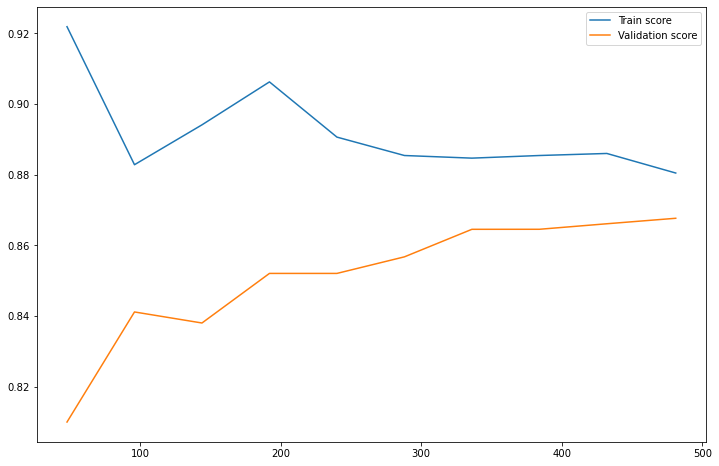

In [54]:
N, train_score, val_score = learning_curve(logreg, X_train, y_train,cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label = 'Train score')
plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
plt.legend();

In [55]:
param_grid = {'solver': ['newton-cg', 'lbgfs', 'liblinear', 'sag', 'saga'],  
              'max_iter': [50, 100, 200, 300, 400, 500]}  
   
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s


{'max_iter': 50, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       113
           1       0.84      0.88      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.82      0.83       276
weighted avg       0.83      0.83      0.83       276



[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.6s finished


### Rien à signaler au niveau des paramètres

### D-1-2) performances avec l'analyse discriminante en tenant compte des paramètres obténus avec grid search cv

In [56]:

ad = LinearDiscriminantAnalysis( solver='svd' ,n_components=1) # appelation de la regression logistique, nous choisissons liblinear vu la petite taille du jeu de donnée
ad.fit(X_train, y_train) # application de la régression logistique sur les données d'entrainement
ad.score(X_train, y_train) #score à l'entrainement

0.8753894080996885

In [57]:
y_pred = ad.predict(X_test) # prédiction des données de test à partir du modèle implementé

In [58]:
ad.score(X_test, y_test) #score sur les données de test

0.8333333333333334

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       113
           1       0.85      0.87      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



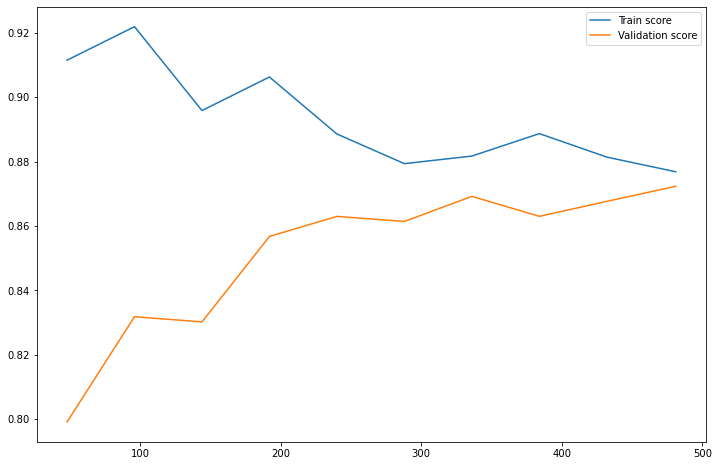

In [60]:
N, train_score, val_score = learning_curve(ad, X_train, y_train,cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label = 'Train score')
plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
plt.legend();

In [61]:
param_grid = {'solver': ['svd', 'lsqr', 'eigen']}  
   
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'solver': 'svd'}
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       113
           1       0.85      0.87      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished


###  Rien à signaler au niveau des paramètres

### D-1-3) Performances avec le séparateur à vaste marge en tenant compte des paramètres obténus avec grid search cv

In [62]:

svm = SVC(kernel='linear') # appelation du séparateur à vaste marge (svm) régulier puisque nous ne définissons pas de noyau suite peut être à une non linéarité de la relation 
svm.fit(X_train, y_train) # application du svm au jeu de donnée
svm.score(X_train, y_train) #score à l'entrainement

0.8785046728971962

In [63]:
y_pred = svm.predict(X_test) # prédiction des données de test à partir du modèle implementé

In [64]:
svm.score(X_test, y_test) #score sur les données de test

0.8369565217391305

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       113
           1       0.85      0.88      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



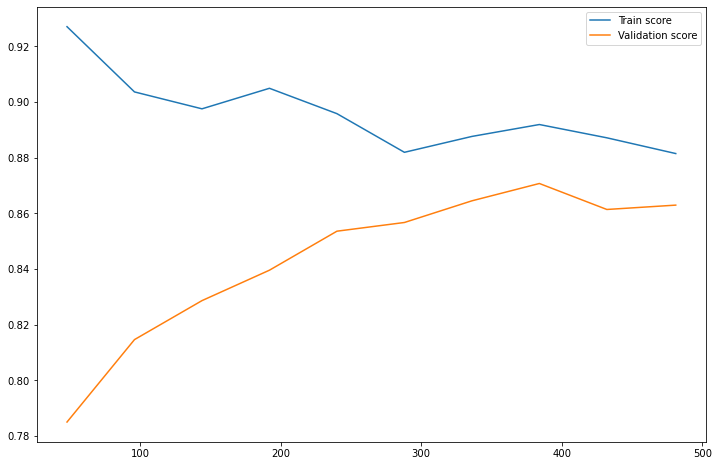

In [66]:
N, train_score, val_score = learning_curve(svm, X_train, y_train,cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label = 'Train score')
plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
plt.legend();

In [67]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid',]}  

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       113
           1       0.86      0.92      0.89       163

    accuracy                           0.87       276
   macro avg       0.87      0.85      0.86       276
weighted avg       0.87      0.87      0.86       276



[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished


###  Dans le cas de normalisation avec robustscaler le grid search cv nous indique que le meilleur paramètre c'est solver ='kernel' verifions les performances dans ce cas

In [68]:

svm = SVC(kernel='rbf') # appelation du séparateur à vaste marge (svm) régulier puisque nous ne définissons pas de noyau suite peut être à une non linéarité de la relation 
svm.fit(X_train, y_train) # application du svm au jeu de donnée
svm.score(X_train, y_train) #score à l'entrainement

0.9096573208722741

In [69]:
y_pred = svm.predict(X_test) # prédiction des données de test à partir du modèle implementé

In [70]:
svm.score(X_test, y_test) #score sur les données de test

0.8659420289855072

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       113
           1       0.86      0.92      0.89       163

    accuracy                           0.87       276
   macro avg       0.87      0.85      0.86       276
weighted avg       0.87      0.87      0.86       276



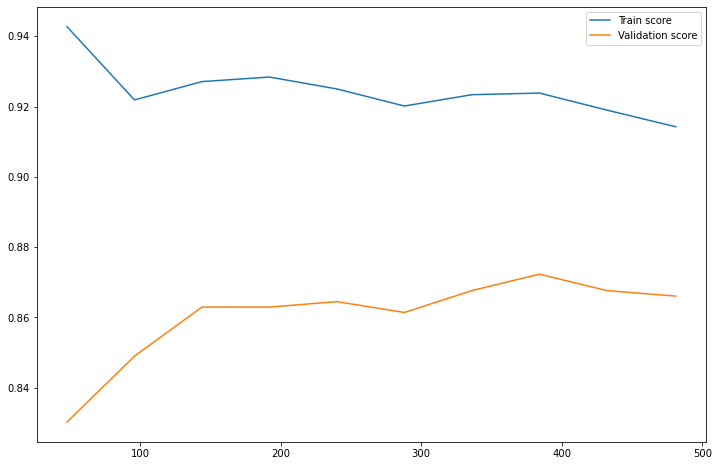

In [72]:
N, train_score, val_score = learning_curve(svm, X_train, y_train,cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label = 'Train score')
plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
plt.legend();

## CONCLUSION GENERALE

On obtient les meilleurs performances en appliquant un svm avec pour noyau 'rbf' en normalisant certaines variables quantitatives. En observant la courbe d'apprentissage, au début, la variance est relative elevée du à l'écart considérable mais au fur et à mésure que les données augmentent, l'écart se réduit progressivement et tends à être constant ce qui nous fais dire que la variance deviendra pas subitement faible ou le modèle surapprentira si l'on apporte de nouvelles données. Et c'est celà qui fait le modèle idéal. 

# C'est ici que prends fin l'exercice merci.